## 01. 선형회귀모델

### 1-1. 단일선형회귀

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

import torch
import torch.nn as nn
import torch.optim as optim
import numpy
import matplotlib.pyplot as plt

Epoch [100/500], Loss:  4.3699
Epoch [200/500], Loss:  4.2948
Epoch [300/500], Loss:  4.2667
Epoch [400/500], Loss:  4.2562
Epoch [500/500], Loss:  4.2523


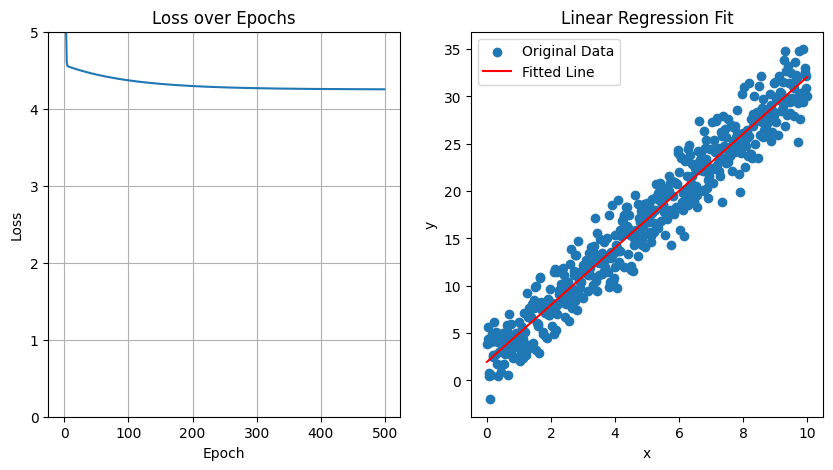

Model Parameters:
hidden.weight: tensor([[-0.9496],
        [ 0.6447],
        [-0.3151],
        [-0.9291],
        [-0.5744],
        [-0.1265],
        [-0.4564],
        [ 0.5685],
        [ 0.7779],
        [ 0.8577]])
hidden.bias: tensor([-0.1640,  0.0390,  0.8097, -0.5256, -0.0715, -0.9852, -0.7699, -0.1580,
         0.1640, -0.5241])
output.weight: tensor([[ 0.1916,  0.0371,  0.2653, -0.0317, -0.1409,  0.0918,  0.2470,  0.2384,
         -0.0697,  0.0047]])
output.bias: tensor([0.0474])
linear.weight: tensor([[3.0104]])
linear.bias: tensor([1.9591])


In [8]:
# 1. 데이터 생성
x = torch.linspace(0,10,500).view(-1,1)     # 입력 데이터
y = 3 * x + 2 + torch.randn(500, 1) * 2     # 레이블

# 2. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self,):
        super().__init__()
        self.hidden = nn.Linear(1,10)   # 입력 1개, 출력 10개
        # self.relu = nn.ReLU()
        # self.sigmoid = nn.Sigmoid()
        self.output = nn.Linear(10,1)
        self.linear = nn.Linear(1,1) # 입력 1개, 출력 1개

    def forward(self,x):
        return self.linear(x)
        x = self.hidden(x)
        # x = self.relu(x)
        # x = self.sigmoid(x)
        x = self.output(x)
        return(x)

model = LinearRegressionModel()

# 3. 손실함수, 옵티마이저 정의 
criterion = nn.MSELoss()     # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 확률적 경사 하강법

# 4. 가중치 업데이트
epochs = 500    # 학습 반복 횟수
losses = [] 

for epoch in range(epochs):
    optimizer.zero_grad()   # 기울기 초기화

    outputs = model(x)  # 예측값 계산
    loss = criterion(outputs, y)    # 손실 계산
    loss.backward()     # 역전파

    optimizer.step()    # 가중치 업데이트

    losses.append(loss.item())

    # 100번에 한번씩 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}")

# 5. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.ylim(0,5)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="r", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")
# plt.plot(x.numpy)
# plt.show()